In [1]:
#!pip install mysql-connector-python
#!pip install pyodbc

In [2]:
#Import Dependency
import pandas as pd
from sqlalchemy import create_engine
import numpy as np

# Read all the dataset 

In [3]:
#Read the 1st file
df1_Vechicle= pd.read_csv("Desktop/CETM50/data/user_data.csv")
df1_Vechicle.head()

,First Name,Second Name,Age (Years),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,Oliver,Brady,68,Male,Mitsubishi,WRX,2003,Sedan
1,Denis,Jackson,35,Male,Toyota,Canyon Regular Cab,2011,Convertible
2,Joshua,Williams,26,Male,Honda,1500 Crew Cab,1999,Sedan
3,Malcolm,Johnson,37,Male,Dodge,Legacy,1996,"Sedan, Wagon"
4,Ashley,Bates,57,Male,Chevrolet,A8,2018,Sedan


In [4]:
##Read second data
df2_CC= pd.read_json ("Desktop/CETM50/data/user_data.json")
df2_CC.head(9)

,firstName,lastName,age,iban,credit_card_number,credit_card_security_code,credit_card_start_date,credit_card_end_date,address_main,address_city,address_postcode,debt
0,Janet,Whittaker,79,GB06TIPX06791401324359,213175641545275,596,12/17,08/20,Studio 6 Robin court,Christopherland,N49 2LB,NaN
1,Kieran,Heath,83,GB28VQOG22478273510511,4153200250709345,248,11/13,08/21,13 Hale light,East Mandy,BA1 4GB,NaN
2,Jane,Turner,29,GB07EALL99866589295356,6011192438703554,610,03/18,04/18,0 Cooper plains,Sharonville,N56 0PY,"{'amount': '4440.19', 'time_period_years': 0}"
3,Arthur,Mistry,27,GB35LSGC87398305883119,502098808533,948,12/18,06/27,312 Parsons junctions,Williamstown,BN5M 3UU,NaN
4,Julian,King,20,GB94ENYC03030578781434,213160758811140,851,06/21,01/25,396 Leon tunnel,South Bethborough,N9J 1TD,NaN
5,Declan,Evans,68,GB23GMZH00735603416296,3593169216116699,4162,06/14,12/24,Flat 45k Kirk mills,New Michellechester,N2E 5DH,NaN
6,Clifford,Read,24,GB78XAOO85264157643435,639043951479,249,11/17,06/19,Studio 24 Jay ways,Port Tomfurt,W5 7XH,NaN
7,Amanda,Skinner,73,GB67UZJG20292766643445,4191308720943461,863,05/16,05/27,Flat 4 Metcalfe falls,Port Arthurton,SE92 6SZ,NaN
8,Nigel,Vaughan,63,GB64QUIC70517389731354,180009854279786,25,01/19,01/21,914 Thompson camp,Edwardschester,AB3 9WE,15822.29


In [5]:
#Read 3rd data
df3_Text= open('Desktop/CETM50/data/user_data.txt', 'r')
for n, line in enumerate (df3_Text.readlines()):
    print (n,line)
    

0 "Debra Wood phoned up at the weekend. They mentioned that they might have gotten their security code incorrect on their billing information, numbers in the wrong order or something. They think that it's 592"

1 "Congratulations on the promotion Howard! Keep up the good work. Enjoy the extra Â£2000 salary, just make sure not to spend it all like last time Hilary. ;) Remember we still work for Hussain-Adams, at least until you win that yacht. See you on Monday"

2 "Happy Birthday Ms Molly Dobson! We can't believe you're turning 82 today. Make sure to check out our latest offers on Home Appliances, offer ends midnight."

3 "INTERNAL MEMO (CONFIDENTIAL): Harrison, we've just found a pretty serious error in Mr Miller's file. He shouldn't be on Â£24515 for his annual pension. This needs rectifying immediately or we're in big trouble! I think it's either Â£27334 or Â£25901... just put the higher one in and hope nobody notices."


In [6]:
df4_Job= pd.read_table("Desktop/CETM50/data/user_data.xml")
df4_Job.head()

""


# Data preprocessing and Feature Extraction 

In [7]:
df1_Vechicle.shape #Result showed a 1000 observations and 8 attributes 

(1000, 8)

In [8]:
df1_Vechicle.isnull().sum() #Result showed there is no missing value

First Name       0
Second Name      0
Age (Years)      0
Sex              0
Vehicle Make     0
Vehicle Model    0
Vehicle Year     0
Vehicle Type     0
dtype: int64

In [9]:
#descriptive statistics of the Quantitative variables
df1_Vechicle.describe() 

,Age (Years),Vehicle Year
count,1000.000000,1000.000000
mean,54.667000,2007.079000
std,20.986056,8.364851
min,18.000000,1992.000000
25%,37.000000,2000.000000
50%,55.000000,2008.000000
75%,71.250000,2015.000000
max,91.000000,2020.000000


In [10]:
##Rename the columns

df1_Vechicle.columns= ['firstName', 'lastName', 'age', 'sex', 'Vehicle_Make',
                       'Vehicle_Model', 'Vehicle_Year', 'Vehicle_Type']
df1_Vechicle.head()

,firstName,lastName,age,sex,Vehicle_Make,Vehicle_Model,Vehicle_Year,Vehicle_Type
0,Oliver,Brady,68,Male,Mitsubishi,WRX,2003,Sedan
1,Denis,Jackson,35,Male,Toyota,Canyon Regular Cab,2011,Convertible
2,Joshua,Williams,26,Male,Honda,1500 Crew Cab,1999,Sedan
3,Malcolm,Johnson,37,Male,Dodge,Legacy,1996,"Sedan, Wagon"
4,Ashley,Bates,57,Male,Chevrolet,A8,2018,Sedan


    Note: I renamed the df1_Vechicle columns just for it to be in comformity with the other dataframes.

In [11]:
df1_Vechicle.dtypes #Check the data types of the attributes 

firstName        object
lastName         object
age               int64
sex              object
Vehicle_Make     object
Vehicle_Model    object
Vehicle_Year      int64
Vehicle_Type     object
dtype: object

In [12]:
##Second df

In [13]:
df2_CC.shape #Result showed a 1000 observations and 12 attributes 

(1000, 12)

In [14]:
df2_CC.isnull().sum().sort_values(ascending= False)

debt                         852
firstName                      0
lastName                       0
age                            0
iban                           0
credit_card_number             0
credit_card_security_code      0
credit_card_start_date         0
credit_card_end_date           0
address_main                   0
address_city                   0
address_postcode               0
dtype: int64

"""
The result above showed debt column has a total missing value of 852, out of 1000 observations.
However, the decision is as good as dropping the column or replacing the null values 
with 0
"""

In [15]:
##Replace the Null in debt column with 0 
df2_CC['debt'].fillna(0, inplace=True)
df2_CC.isnull().sum().sort_values(ascending= False)

firstName                    0
lastName                     0
age                          0
iban                         0
credit_card_number           0
credit_card_security_code    0
credit_card_start_date       0
credit_card_end_date         0
address_main                 0
address_city                 0
address_postcode             0
debt                         0
dtype: int64

In [16]:
df2_CC['debt'] = df2_CC['debt'].astype(str) #Convert debt column to string
df2_CC['credit_card_number'] = df2_CC['credit_card_number'].astype(str) #Convert credit_card_number column to string
df2_CC.dtypes #Check the data types of the attributes 

firstName                    object
lastName                     object
age                           int64
iban                         object
credit_card_number           object
credit_card_security_code     int64
credit_card_start_date       object
credit_card_end_date         object
address_main                 object
address_city                 object
address_postcode             object
debt                         object
dtype: object

In [17]:
#descriptive statistics of the Quantitative variables
df2_CC.describe()

,age,credit_card_security_code
count,1000.000000,1000.000000
mean,54.667000,978.275000
std,20.986056,1695.154798
min,18.000000,0.000000
25%,37.000000,301.750000
50%,55.000000,578.000000
75%,71.250000,822.500000
max,91.000000,9944.000000


##Since we have three attributes ( 'firstName', 'lastName', 'age') in common between df1_Vechicle and df2_CC, then it can be joined together.

In [18]:
##Merge df1&2 together
df_combined= pd.merge(df1_Vechicle, df2_CC, how='left', left_on=['firstName', 'lastName', 'age'], 
                      right_on= ['firstName', 'lastName', 'age'])
df_combined.head()

,firstName,lastName,age,sex,Vehicle_Make,Vehicle_Model,Vehicle_Year,Vehicle_Type,iban,credit_card_number,credit_card_security_code,credit_card_start_date,credit_card_end_date,address_main,address_city,address_postcode,debt
0,Oliver,Brady,68,Male,Mitsubishi,WRX,2003,Sedan,GB22ZLAW73114167985782,5141290311954834,946,11/20,01/30,Studio 15 Donna lights,Stuarthaven,EC3R 6QB,"{'amount': '17403.80', 'time_period_years': 2}"
1,Denis,Jackson,35,Male,Toyota,Canyon Regular Cab,2011,Convertible,GB34XERJ15638486218742,2246218069251294,666,07/16,10/30,Studio 38r Gordon wells,Cunninghamfort,SW54 8ZR,0
2,Joshua,Williams,26,Male,Honda,1500 Crew Cab,1999,Sedan,GB76FFNA64547647754971,4017034567048676352,133,05/18,06/20,173 Jones meadow,Hallstad,S97 8RB,0
3,Malcolm,Johnson,37,Male,Dodge,Legacy,1996,"Sedan, Wagon",GB46ZLCD77668687243311,4603290222882884096,241,06/17,04/21,Flat 92 Dale courts,North Dominic,ME80 4BN,0
4,Ashley,Bates,57,Male,Chevrolet,A8,2018,Sedan,GB62OYNA11401233406947,2405870932540001,271,08/16,03/31,0 Josephine mountain,Aimeeberg,NN3 1BS,0


In [19]:
df_combined.shape

(1000, 17)

In [20]:
df_combined.describe()

,age,Vehicle_Year,credit_card_security_code
count,1000.000000,1000.000000,1000.000000
mean,54.667000,2007.079000,978.275000
std,20.986056,8.364851,1695.154798
min,18.000000,1992.000000,0.000000
25%,37.000000,2000.000000,301.750000
50%,55.000000,2008.000000,578.000000
75%,71.250000,2015.000000,822.500000
max,91.000000,2020.000000,9944.000000


In [21]:
df_combined.dtypes

firstName                    object
lastName                     object
age                           int64
sex                          object
Vehicle_Make                 object
Vehicle_Model                object
Vehicle_Year                  int64
Vehicle_Type                 object
iban                         object
credit_card_number           object
credit_card_security_code     int64
credit_card_start_date       object
credit_card_end_date         object
address_main                 object
address_city                 object
address_postcode             object
debt                         object
dtype: object

In [22]:
df_combined.isnull().sum().sort_values(ascending= False) #Just to confirm any other missing value.

firstName                    0
credit_card_number           0
address_postcode             0
address_city                 0
address_main                 0
credit_card_end_date         0
credit_card_start_date       0
credit_card_security_code    0
iban                         0
lastName                     0
Vehicle_Type                 0
Vehicle_Year                 0
Vehicle_Model                0
Vehicle_Make                 0
sex                          0
age                          0
debt                         0
dtype: int64

In [23]:
## parsing the XML data

import xml.etree.ElementTree as ET
df4_Job= 'Desktop/CETM50/data/user_data.xml'
df4_Job= ET.parse(df4_Job)
df4_Job= df4_Job.getroot()
print(df4_Job)

<Element 'users' at 0x000001FB122C3720>


In [24]:
print(df4_Job.attrib)

{}


In [25]:
print(df4_Job.tag[0:6])

users


In [26]:
print(df4_Job[0].tag)

user


# Write a for-loop function and write to CSV

In [27]:
import csv
df4_Job_cols= ['firstName', 'lastName', 'age', 'sex', 'retired', 'dependants', 'marital_status', 'salary', 'pension', 'company',
          'commute_distance', 'address_postcode']

df4_Job_rows=[]

#Write the for loop
for x in df4_Job:
    F_name = x.attrib.get('firstName')
    L_name = x.attrib.get('lastName')
    Age = x.attrib.get('age')
    Sex = x.attrib.get('sex')
    Retired = x.attrib.get('retired')
    Dependants = x.attrib.get('dependants')
    M_status = x.attrib.get('marital_status')
    Salary = x.attrib.get('salary')
    Pension = x.attrib.get('pension')
    Company = x.attrib.get('company')
    C_distance= x.attrib.get('commute_distance')
    Postcode= x.attrib.get('address_postcode')
    df4_Job_rows.append({'firstName': F_name, 'lastName': L_name, 'age': Age, 'sex': Sex, 'retired': Retired, 
                                   'dependants': Dependants, 'marital_status': M_status, 'salary': Salary, 
                                   'pension': Pension, 'company': Company, 'commute_distance': C_distance, 
                                   'address_postcode': Postcode})


##Write to CSVfile
with open('Desktop/CETM50/data/df4_Job_new', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames =df4_Job_cols)
    writer.writeheader()
    writer.writerows(df4_Job_rows)

In [28]:
##Read the new df4_job
df4_Job_new= pd.read_csv('Desktop/CETM50/data/df4_Job_new')
df4_Job_new.tail(5)

,firstName,lastName,age,sex,retired,dependants,marital_status,salary,pension,company,commute_distance,address_postcode
995,Victoria,Khan,42,Female,False,1.0,single,64913,0,Khan Ltd,15.53,W4 5UF
996,Katie,Owen,84,Female,False,2.0,single,47371,0,Atkins-Baxter,12.54,EX88 2UT
997,Kieran,Heath,83,Male,True,1.0,single,44730,13803,NaN,0.00,BA1 4GB
998,Lee,Holland,86,Male,True,2.0,married or civil partner,42968,18108,NaN,0.00,S4 5TR
999,Gerard,Thomas,57,Male,False,2.0,widowed,42881,0,Lloyd-Barber,11.68,G23 8US


In [29]:
df4_Job_new.shape

(1000, 12)

In [30]:
df4_Job_new.describe()

,age,dependants,salary,pension,commute_distance
count,1000.000000,978.000000,1000.000000,1000.000000,1000.000000
mean,54.667000,2.168712,57393.480000,5982.051000,10.540670
std,20.986056,0.964658,23560.620002,11360.109547,7.006735
min,18.000000,1.000000,17179.000000,0.000000,0.000000
25%,37.000000,2.000000,37203.750000,0.000000,5.930000
50%,55.000000,2.000000,58038.000000,0.000000,11.910000
75%,71.250000,3.000000,78381.250000,0.000000,16.580000
max,91.000000,5.000000,98909.000000,45168.000000,20.340000


<AxesSubplot:>

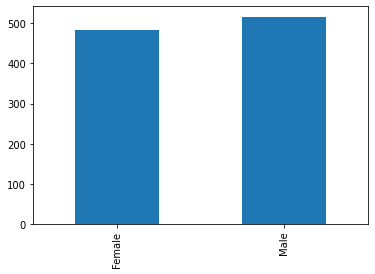

In [31]:
#This method can be used to check for the value count of each attributes #df4_Job_new[' '].value_counts()

df4_Job_new['sex'].value_counts().sort_values(ascending=True).plot.bar() 

In [32]:
#This method can be used to check for the modal class of each attributes
df4_Job_new['company'].value_counts().index[0]

'Jones Inc'

In [33]:
#Checking for the missing values
df4_Job_new.isnull().sum().sort_values(ascending= False)

company             242
dependants           22
firstName             0
lastName              0
age                   0
sex                   0
retired               0
marital_status        0
salary                0
pension               0
commute_distance      0
address_postcode      0
dtype: int64

From the result above, company and dependants columns has 242 and 22 missing values respectively out of 1000 observations.
If we are to do a raw analysis on this data,
##The "company" being an object datatype, the missing values can be replaced by the modal class (Jones Inc) with the code below:
#df4_Job_new['company'].fillna(df4_Job_new['company'].value_counts().index[0], inplace =True)
However, this can be biased on the data set and it's not really advisable so i am filling it with "None". 

#The "dependants" being a float datatype, the missing values will be replaced with the mean (2.168712)with the code below:
#df4_Job_new['dependants'].fillna(df4_Job_new['dependants'].mean(), inplace= True)
However, this is so meaniful because the missing observertions are just 22 of 1000

In [34]:
df4_Job_new['company']= df4_Job_new['company'].replace(np.nan, 'None')#Fill the missing value with None

In [35]:
#Checking for the mean od the attribute 'dependants'. It can also be viewed above from output
df4_Job_new['dependants'].mean()

2.168711656441718

In [36]:
df4_Job_new['dependants'].fillna(df4_Job_new['dependants'].mean(), inplace= True) #Fill with mean

In [37]:
df4_Job_new.shape

(1000, 12)

In [38]:
df4_Job_new.isnull().sum() #confirm if all the missing values has been replaced   

firstName           0
lastName            0
age                 0
sex                 0
retired             0
dependants          0
marital_status      0
salary              0
pension             0
company             0
commute_distance    0
address_postcode    0
dtype: int64

In [39]:
##merge the first combined df with the XML file together
df_combined= pd.merge(df_combined, df4_Job_new, how='left', left_on=['firstName', 'lastName', 'age', 'sex', 'address_postcode'], 
                      right_on= ['firstName', 'lastName', 'age', 'sex','address_postcode'])
df_combined.head()

,firstName,lastName,age,sex,Vehicle_Make,Vehicle_Model,Vehicle_Year,Vehicle_Type,iban,credit_card_number,...,address_city,address_postcode,debt,retired,dependants,marital_status,salary,pension,company,commute_distance
0,Oliver,Brady,68,Male,Mitsubishi,WRX,2003,Sedan,GB22ZLAW73114167985782,5141290311954834,...,Stuarthaven,EC3R 6QB,"{'amount': '17403.80', 'time_period_years': 2}",False,2.000000,single,62743,0,Myers-Smith,15.18
1,Denis,Jackson,35,Male,Toyota,Canyon Regular Cab,2011,Convertible,GB34XERJ15638486218742,2246218069251294,...,Cunninghamfort,SW54 8ZR,0,False,3.000000,married or civil partner,82669,0,Smith-Stewart,18.16
2,Joshua,Williams,26,Male,Honda,1500 Crew Cab,1999,Sedan,GB76FFNA64547647754971,4017034567048676352,...,Hallstad,S97 8RB,0,False,2.168712,single,27951,0,Knowles-Willis,8.47
3,Malcolm,Johnson,37,Male,Dodge,Legacy,1996,"Sedan, Wagon",GB46ZLCD77668687243311,4603290222882884096,...,North Dominic,ME80 4BN,0,False,5.000000,married or civil partner,37670,0,Baker Ltd,10.64
4,Ashley,Bates,57,Male,Chevrolet,A8,2018,Sedan,GB62OYNA11401233406947,2405870932540001,...,Aimeeberg,NN3 1BS,0,False,1.000000,single,19783,0,Read-Smith,6.33


In [40]:
df_combined.shape

(1000, 24)

In [41]:
#Confirming if there is no other new missing values
df_combined.isnull().sum().sort_values(ascending=False)

firstName                    0
lastName                     0
company                      0
pension                      0
salary                       0
marital_status               0
dependants                   0
retired                      0
debt                         0
address_postcode             0
address_city                 0
address_main                 0
credit_card_end_date         0
credit_card_start_date       0
credit_card_security_code    0
credit_card_number           0
iban                         0
Vehicle_Type                 0
Vehicle_Year                 0
Vehicle_Model                0
Vehicle_Make                 0
sex                          0
age                          0
commute_distance             0
dtype: int64

In [42]:
# Numbering the column from 1 to 1000
#sn = []
#for x in range(1, len(df_combined) + 1):
    #sn.append(f'{x}')
    
#df_combined['sn'] = sn ##serial number for the rows

In [43]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   firstName                  1000 non-null   object 
 1   lastName                   1000 non-null   object 
 2   age                        1000 non-null   int64  
 3   sex                        1000 non-null   object 
 4   Vehicle_Make               1000 non-null   object 
 5   Vehicle_Model              1000 non-null   object 
 6   Vehicle_Year               1000 non-null   int64  
 7   Vehicle_Type               1000 non-null   object 
 8   iban                       1000 non-null   object 
 9   credit_card_number         1000 non-null   object 
 10  credit_card_security_code  1000 non-null   int64  
 11  credit_card_start_date     1000 non-null   object 
 12  credit_card_end_date       1000 non-null   object 
 13  address_main               1000 non-null   object

In [44]:
##Adding the txt file to update the clients files

In [45]:
#Check the validity of the first text and replace with the right one
'''
Debra Wood phoned up at the weekend. They mentioned that they might have gotten their security code 
incorrect on their billing information, numbers in the wrong order or something. They think that it's 592
'''
text_1= df_combined.index[(df_combined['firstName']=='Debra') & (df_combined['lastName']=='Wood')]
df_combined.at[text_1[0], 'credit_card_security_code']

952

In [46]:
##The result above showed the wrong "credit card security code" is 952 so let's replace it with the correct one (592).

text_1= df_combined.index[(df_combined['firstName']=='Debra') & (df_combined['lastName']=='Wood')]
df_combined.at[text_1[0], 'credit_card_security_code']= 592

In [47]:
##Check for the main salary of Hilary from the second text
'''
Congratulations on the promotion Howard! Keep up the good work. Enjoy the extra Â£2000 salary, 
just make sure not to spend it all like last time Hilary. ;) Remember we still work for Hussain-Adams, 
at least until you win that yacht. See you on Monday
'''
text_2= df_combined.index[(df_combined['lastName']=='Howard') & (df_combined['company']=='Hussain-Adams')]
df_combined.at[text_2[0], 'salary']


84396

In [48]:
##The result above showed the main salary (84396) of Hilary Howard before his promotion. 

In [49]:
#Adding the extra salary '2000' for is new promotion 
text_2= df_combined.index[(df_combined['lastName']=='Howard') & (df_combined['company']=='Hussain-Adams')]
df_combined.at[text_2[0], 'salary']+=2000


text_2= df_combined.index[(df_combined['firstName']=='Hilary') & (df_combined['lastName']=='Howard')]
df_combined.at[text_2[0], 'salary'] #To view again for affirmation of the salary update

86396

#New salary= 86396.
'''
Do note that we have three different attributes (firstName, lastName & company). Any two of the attributes can be used 
to call out an observation.
'''

In [50]:
#Check the validity of Molly's age from the third text
'''
Happy Birthday Ms Molly Dobson! We can't believe you're turning 82 today. Make sure to check out our latest 
offers on Home Appliances, offer ends midnight
'''
text_3= df_combined.index[(df_combined['firstName']=='Molly') & (df_combined['lastName']=='Dobson')]
df_combined.at[text_3[0], 'age']

81

In [51]:
#Result above showed Molly's age needs to be updated to her new age 82
text_3= df_combined.index[(df_combined['firstName']=='Molly') & (df_combined['lastName']=='Dobson')]
df_combined.at[text_3[0], 'age']=82

In [52]:
#Change the annual pension of Miller from 24515 to 27334 from the last text
'''
INTERNAL MEMO (CONFIDENTIAL): Harrison, we've just found a pretty serious error in Mr Miller's file. 
He shouldn't be on Â£24515 for his annual pension. This needs rectifying immediately or we're in big trouble! 
I think it's either Â£27334 or Â£25901... just put the higher one in and hope nobody notices.
'''

text_4= df_combined.index[(df_combined['lastName']=='Miller') & (df_combined['pension']== 24515)]
df_combined.at[text_4[0], 'pension']= 27334

In [53]:
#Adding a serial number as the uniform identity primary key
sn = []
for x in range(1, len(df_combined) + 1):
    sn.append(f'SN{x}')

df_combined['sn'] = sn

In [54]:
#Write the df to csv file for a hardcopy.
df_combined= pd.DataFrame(df_combined)
df_combined.to_csv('df_Combined.csv')

## Writing into a relational Database using PonyORM

In [56]:
#!pip install mysql-connector-python
import mysql.connector
from mysql.connector import Error
from datetime import datetime
#!pip install pymysql
#!pip install petl
import pymysql
from pony import orm
import petl as etl
from pony.orm import *

In [57]:
db= orm.Database()

In [58]:
#Creating entities
class Clients(db.Entity):   
    sn= orm.PrimaryKey(str)
    firstName = orm.Required(str, column='First Name') 
    lastName = orm.Required(str, column='Last Name') 
    age = orm.Required (int, column='Age')
    sex = orm.Required(str, column='Sex')
    marital_status = orm.Required(str, column='Marital Status')
    salary = orm.Required (int, column='Salary') 
    pension = orm.Required (int, column='Pension')
    retired = orm.Required(bool, column='Retired') 
    dependants = orm.Required(float, column='Dependants')   
    company = orm.Optional(str)
    commute_distance = orm.Required (float, column= 'Commute Distance')
    creditCard= Set('CreditCard')
    vehicles= Set('Vehicles')
    address= Set('Address')
    

In [59]:
class CreditCard(db.Entity):
    sn=orm.Required(Clients)
    iban = orm.Required(str)
    debt= orm.Required(str, column= 'Debt')
    credit_card_number = orm.Required (str, column='Card Number')
    credit_card_security_code = orm.Required (int, column='CVV')
    credit_card_start_date = orm.Required(str, column='Issued Date')
    credit_card_end_date = orm.Required(str, column='Expire Date')    

In [60]:
class Vehicles (db.Entity):     
    sn=orm.Required(Clients)
    Vehicle_Make = orm.Required(str, column='Vehicle Make')
    Vehicle_Model = orm.Required(str, column='Model')
    Vehicle_Year = orm.Required (int, column='Vehicle year')
    Vehicle_Type = orm.Required(str, column='Type')
   

In [61]:
class Address(db.Entity):    
    sn=orm.Required(Clients)
    address_main = orm.Required(str, column='Full Address')
    address_city = orm.Required(str, column='City')
    address_postcode = orm.Required(str, column='Postcode')
       

In [62]:
#database credentials
db.bind(provider = 'mysql', host='europa.ashley.work', user='student_bh86dv', 
              password='iE93F2@8EhM@1zhD&u9M@K', db='student_bh86dv')

orm.set_sql_debug(True)
db.generate_mapping(create_tables=True) #Generating mapping

GET CONNECTION FROM THE LOCAL POOL
SET foreign_key_checks = 0
CREATE TABLE `clients` (
  `sn` VARCHAR(255) PRIMARY KEY,
  `First Name` VARCHAR(255) NOT NULL,
  `Last Name` VARCHAR(255) NOT NULL,
  `Age` INTEGER NOT NULL,
  `Sex` VARCHAR(255) NOT NULL,
  `Marital Status` VARCHAR(255) NOT NULL,
  `Salary` INTEGER NOT NULL,
  `Pension` INTEGER NOT NULL,
  `Retired` BOOLEAN NOT NULL,
  `Dependants` DOUBLE NOT NULL,
  `company` VARCHAR(255) NOT NULL,
  `Commute Distance` DOUBLE NOT NULL
)

CREATE TABLE `address` (
  `id` INTEGER PRIMARY KEY AUTO_INCREMENT,
  `sn` VARCHAR(255) NOT NULL,
  `Full Address` VARCHAR(255) NOT NULL,
  `City` VARCHAR(255) NOT NULL,
  `Postcode` VARCHAR(255) NOT NULL
)

CREATE INDEX `idx_address__sn` ON `address` (`sn`)

ALTER TABLE `address` ADD CONSTRAINT `fk_address__sn` FOREIGN KEY (`sn`) REFERENCES `clients` (`sn`) ON DELETE CASCADE

CREATE TABLE `creditcard` (
  `id` INTEGER PRIMARY KEY AUTO_INCREMENT,
  `sn` VARCHAR(255) NOT NULL,
  `iban` VARCHAR(255) NOT NUL

In [63]:
#Creating a table from the combined dataframe
CLIENTS= df_combined[['sn','firstName', 'lastName', 'age', 'sex', 'marital_status', 'salary', 
                    'pension', 'retired', 'dependants', 'company', 'commute_distance']].copy()


CREDITCARD= df_combined[['sn','iban', 'debt', 'credit_card_number', 'credit_card_security_code',
                          'credit_card_start_date', 'credit_card_end_date']].copy()


VEHICLES= df_combined[['sn','Vehicle_Make', 'Vehicle_Model', 'Vehicle_Year', 'Vehicle_Type']].copy()


ADDRESS= df_combined[['sn','address_main', 'address_city', 'address_postcode']].copy()

In [65]:
#Merge the rows with the created table
for i, user in CLIENTS.iterrows():
    Clients(
        sn = user['sn'],
        firstName= user['firstName'], 
        lastName= user['lastName'], 
        age= user['age'],
        sex= user['sex'], 
        marital_status= user['marital_status'], 
        salary= user['salary'], 
        pension= user['pension'], 
        retired= user['retired'], 
        dependants= user['dependants'], 
        company= user['company'], 
        commute_distance= user['commute_distance']
    )
    
for i, cc in CREDITCARD.iterrows():
    CreditCard(
        sn = cc['sn'],
        iban= cc['iban'], 
        debt= cc['debt'], 
        credit_card_number= cc['credit_card_number'], 
        credit_card_security_code= cc['credit_card_security_code'],
        credit_card_start_date= cc['credit_card_start_date'], 
        credit_card_end_date= cc['credit_card_end_date']    
    )
    
    
    
for i , vehicle in VEHICLES.iterrows():
    Vehicles(
        sn = vehicle['sn'],
        Vehicle_Make= vehicle['Vehicle_Make'],
        Vehicle_Model= vehicle['Vehicle_Model'], 
        Vehicle_Year= vehicle['Vehicle_Year'], 
        Vehicle_Type= vehicle['Vehicle_Type']
    )
    

    
for i, address in ADDRESS.iterrows():
    Address(
        sn = address['sn'],
        address_main= address['address_main'], 
        address_city= address['address_city'], 
        address_postcode= address['address_postcode']
    )
    
commit()

GET NEW CONNECTION
INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN1', 'Oliver', 'Brady', 68, 'Male', 'single', 62743, 0, False, 2.0, 'Myers-Smith', 15.18]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN2', 'Denis', 'Jackson', 35, 'Male', 'married or civil partner', 82669, 0, False, 3.0, 'Smith-Stewart', 18.16]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN3', 'Joshua', 'Williams', 26, 'Male', 'single', 27951, 0, False, 2.168711656441718, 'Knowles-Willis', 8.4

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN27', 'Alice', 'Bentley', 88, 'Female', 'single', 61997, 26748, True, 3.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN28', 'Teresa', 'Armstrong', 81, 'Female', 'married or civil partner', 46535, 14950, True, 1.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN29', 'Maurice', 'Giles', 38, 'Male', 'married or civil partner', 36926, 0, False, 1.0, 'Storey, Todd and Craig', 10.48]

INSERT 

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN53', 'Shaun', 'Davidson', 58, 'Male', 'divorced', 46362, 0, False, 2.0, 'Simpson LLC', 12.35]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN54', 'Owen', 'Cooper', 32, 'Male', 'married or civil partner', 62314, 0, False, 2.0, 'Williamson-Day', 15.11]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN55', 'Owen', 'Moore', 88, 'Male', 'single', 53013, 43359, True, 2.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First 

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN83', 'Gavin', 'Stephenson', 66, 'Male', 'single', 59915, 0, False, 1.0, 'Holt, Sheppard and Hughes', 14.72]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN84', 'Mathew', 'Howell', 26, 'Male', 'married or civil partner', 89849, 0, False, 2.0, 'Brown LLC', 19.15]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN85', 'Josh', 'Humphries', 84, 'Male', 'married or civil partner', 54258, 19934, True, 2.0, 'None', 0.0]

INS

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN108', 'Kelly', 'Taylor', 77, 'Female', 'married or civil partner', 64508, 16302, True, 2.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN109', 'Jayne', 'Harrison', 71, 'Female', 'single', 64449, 33473, True, 1.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN110', 'Ashley', 'Hill', 45, 'Male', 'married or civil partner', 59017, 0, False, 1.0, 'May, Lewis and Atkinson', 14.57]

INSERT I

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN136', 'Francesca', 'Barker', 81, 'Female', 'married or civil partner', 39335, 0, False, 2.0, 'Wilson-Norman', 10.98]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN137', 'Trevor', 'Brown', 22, 'Male', 'single', 38463, 0, False, 1.0, 'Long, Lewis and Wilkins', 10.8]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN138', 'Sam', 'Smith', 26, 'Male', 'single', 57452, 0, False, 2.0, 'Bevan-Winter', 14.31]

INSERT INTO `c

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN164', 'Tracy', 'Gallagher', 87, 'Female', 'married or civil partner', 54899, 11376, True, 2.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN165', 'Howard', 'Wallace', 87, 'Male', 'single', 25780, 31815, True, 2.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN166', 'Zoe', 'McCarthy', 74, 'Female', 'single', 43657, 16412, True, 3.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN191', 'Laura', 'Johnson', 70, 'Female', 'married or civil partner', 26919, 0, False, 5.0, 'Robinson, Gilbert and Rogers', 8.22]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN192', 'Scott', 'Hunt', 78, 'Male', 'single', 29380, 19371, True, 2.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN193', 'Lewis', 'Miller', 83, 'Male', 'widowed', 82074, 27334, True, 2.0, 'None', 0.0]

INSERT INTO `clients` (`s

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN222', 'Adam', 'Humphreys', 69, 'Male', 'single', 77446, 11875, True, 4.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN223', 'Patricia', 'Gough', 26, 'Female', 'single', 24740, 0, False, 3.0, 'Lewis, Brooks and Riley', 7.67]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN224', 'Natasha', 'Wood', 48, 'Female', 'married or civil partner', 59783, 0, False, 2.0, 'Cook Inc', 14.7]

INSERT INTO `clients` 

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN255', 'Allan', 'Gould', 58, 'Male', 'married or civil partner', 62466, 0, False, 2.0, 'Smith-Gray', 15.14]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN256', 'Shirley', 'Shah', 80, 'Female', 'married or civil partner', 80165, 28536, True, 4.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN257', 'Bernard', 'Hughes', 31, 'Male', 'married or civil partner', 57989, 0, False, 2.0, 'Ali, Bell and Robson'

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN284', 'Julie', 'Cook', 77, 'Female', 'widowed', 91908, 22500, True, 1.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN285', 'Norman', 'Howells', 87, 'Male', 'single', 80988, 34272, True, 1.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN286', 'Benjamin', 'Smith', 67, 'Male', 'married or civil partner', 34574, 0, False, 1.0, 'Walker-Naylor', 9.98]

INSERT INTO `clients` (`sn`, `First N

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN315', 'Rosie', 'Holden', 38, 'Female', 'single', 83537, 0, False, 4.0, 'Cole-Clements', 18.29]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN316', 'Alexander', 'Jones', 88, 'Male', 'single', 22862, 7408, True, 1.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN317', 'Glen', 'Frost', 65, 'Male', 'single', 65708, 0, False, 2.0, 'Moore, Robinson and Smith', 15.65]

INSERT INTO `clients` (`sn`, `First N

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN346', 'Callum', 'Haynes', 87, 'Male', 'married or civil partner', 67112, 26854, True, 1.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN347', 'Lauren', 'Coleman', 26, 'Female', 'married or civil partner', 60405, 0, False, 1.0, 'Johnson-Evans', 14.8]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN348', 'Joel', 'White', 75, 'Male', 'married or civil partner', 56060, 27675, True, 3.0, 'None', 0.0]

INS

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN375', 'Ryan', 'Watson', 29, 'Male', 'married or civil partner', 82852, 0, False, 3.0, 'Gallagher and Sons', 18.19]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN376', 'Michael', 'Anderson', 85, 'Male', 'married or civil partner', 58524, 39479, True, 2.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN377', 'George', 'Watson', 69, 'Male', 'single', 39814, 0, False, 5.0, 'Lee-Flynn', 11.08]

INSERT INT

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN406', 'Terry', 'King', 80, 'Male', 'married or civil partner', 60050, 28163, True, 2.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN407', 'Michelle', 'Lord', 86, 'Female', 'married or civil partner', 37653, 15470, True, 2.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN408', 'Jasmine', 'Bruce', 44, 'Female', 'divorced', 62886, 0, False, 2.0, 'Adams, Heath and McDonald', 15.2]

INSERT

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN436', 'Rebecca', 'West', 30, 'Female', 'married or civil partner', 49560, 0, False, 2.0, 'Cooper-Booth', 12.94]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN437', 'Gemma', 'Kent', 42, 'Female', 'married or civil partner', 27477, 0, False, 1.0, 'Mills-Mason', 8.35]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN438', 'Arthur', 'Smith', 77, 'Male', 'divorced', 63170, 28503, True, 3.0, 'None', 0.0]

INSERT INTO `cl

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN462', 'Lisa', 'Clark', 61, 'Female', 'single', 34870, 0, False, 2.0, 'Smith Inc', 10.04]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN463', 'Jacob', 'Collins', 75, 'Male', 'widowed', 69420, 17983, True, 2.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN464', 'Alice', 'Martin', 57, 'Female', 'single', 66873, 0, False, 2.0, 'Holland-Spencer', 15.83]

INSERT INTO `clients` (`sn`, `First Name`, `Last 

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN488', 'Edward', 'Edwards', 23, 'Male', 'single', 64322, 0, False, 1.0, 'Lewis-Richardson', 15.43]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN489', 'Sylvia', 'Lloyd', 33, 'Female', 'married or civil partner', 66949, 0, False, 2.0, 'Price-Ashton', 15.85]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN490', 'Hilary', 'Smith', 76, 'Female', 'single', 50233, 37736, True, 2.0, 'None', 0.0]

INSERT INTO `clients` (`s

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN517', 'Jay', 'Marshall', 71, 'Male', 'married or civil partner', 79702, 0, False, 2.0, 'Davis, Robertson and Wood', 17.75]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN518', 'Danny', 'Murphy', 34, 'Male', 'married or civil partner', 86347, 0, False, 5.0, 'Gould, Johnson and Brown', 18.67]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN519', 'Adrian', 'Williams', 50, 'Male', 'married or civil partner', 27566, 0, 

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN543', 'Clifford', 'Ali', 78, 'Male', 'single', 72010, 0, False, 2.0, 'Daniels-Brooks', 16.62]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN544', 'Ian', 'Allen', 71, 'Male', 'married or civil partner', 96791, 0, False, 1.0, 'Collins-Doyle', 20.07]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN545', 'Gillian', 'Jones', 85, 'Female', 'married or civil partner', 49216, 26972, True, 2.0, 'None', 0.0]

INSERT INTO `c

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN575', 'Donna', 'Wright', 37, 'Female', 'married or civil partner', 82067, 0, False, 1.0, 'Williams, Phillips and Smith', 18.08]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN576', 'Stacey', "O'Neill", 37, 'Female', 'single', 52366, 0, False, 3.0, 'Riley PLC', 13.44]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN577', 'Trevor', 'Hopkins', 55, 'Male', 'single', 79762, 0, False, 4.0, 'Warner Ltd', 17.75]

INSERT IN

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN601', 'Margaret', 'Hunt', 38, 'Female', 'single', 98431, 0, False, 2.0, 'Ball, Thompson and Ford', 20.28]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN602', 'Rosemary', 'Taylor', 39, 'Female', 'single', 65347, 0, False, 5.0, 'Humphreys Group', 15.6]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN603', 'Holly', 'Ford', 61, 'Female', 'single', 60262, 0, False, 2.0, 'Price, Powell and Roberts', 14.78]

INSERT INTO 

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN630', 'Natalie', 'Moore', 23, 'Female', 'married or civil partner', 24604, 0, False, 2.0, 'Ellis-Reynolds', 7.64]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN631', 'Diana', 'Lyons', 81, 'Female', 'single', 68825, 31915, True, 4.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN632', 'Kayleigh', 'Robinson', 70, 'Female', 'married or civil partner', 55223, 0, False, 3.0, 'Khan Ltd', 13.93]

INSERT IN

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN657', 'Judith', 'Mills', 25, 'Female', 'married or civil partner', 86638, 0, False, 2.0, 'Reed, Gibson and Robinson', 18.71]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN658', 'Edward', 'Carter', 78, 'Male', 'married or civil partner', 82064, 16005, True, 2.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN659', 'Reece', 'Brown', 63, 'Male', 'married or civil partner', 21450, 0, False, 2.16871165644

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN683', 'Gemma', 'Price', 32, 'Female', 'divorced', 41994, 0, False, 3.0, 'Howarth-Savage', 11.51]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN684', 'Deborah', 'Barnett', 43, 'Female', 'married or civil partner', 65732, 0, False, 3.0, 'Stevenson LLC', 15.66]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN685', 'Christine', 'Sullivan', 41, 'Female', 'single', 57414, 0, False, 1.0, 'Moss-Thomas', 14.3]

INSERT INTO

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN710', 'Elliott', 'Russell', 80, 'Male', 'single', 40100, 29499, True, 2.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN711', 'Louis', 'Johnson', 65, 'Male', 'single', 77702, 0, False, 4.0, 'Parsons-Gardner', 17.46]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN712', 'Edward', 'White', 51, 'Male', 'single', 39485, 0, False, 5.0, 'Evans and Sons', 11.01]

INSERT INTO `clients` (`sn`, `First Name`, `

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN737', 'Bethan', 'Douglas', 44, 'Female', 'married or civil partner', 27589, 0, False, 3.0, 'Hyde-Poole', 8.38]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN738', 'Trevor', 'Robinson', 23, 'Male', 'married or civil partner', 45703, 0, False, 3.0, 'Wells, Connolly and Roberts', 12.22]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN739', 'Hazel', 'Francis', 24, 'Female', 'married or civil partner', 79723, 0, False,

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN763', 'Lucy', 'Watson', 26, 'Female', 'married or civil partner', 45373, 0, False, 3.0, 'Phillips-Lloyd', 12.16]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN764', 'Anna', 'Walker', 64, 'Female', 'married or civil partner', 57955, 0, False, 1.0, 'Singh, Hussain and Lucas', 14.4]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN765', 'Robin', 'Chambers', 86, 'Male', 'widowed', 62749, 9215, True, 2.0, 'None', 0.0]



INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN791', 'Timothy', 'Davies', 25, 'Male', 'single', 94917, 0, False, 3.0, 'Brown-Holland', 19.82]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN792', 'Christian', 'Smith', 29, 'Male', 'widowed', 44317, 0, False, 1.0, 'Banks, Woodward and Yates', 11.96]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN793', 'Wendy', 'Webb', 21, 'Female', 'married or civil partner', 95968, 0, False, 2.0, 'James-Hughes', 19.96]

INSERT I

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN820', 'Daniel', 'Rowley', 82, 'Male', 'married or civil partner', 69655, 32436, True, 2.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN821', 'Aaron', 'Thomas', 32, 'Male', 'married or civil partner', 40932, 0, False, 2.0, 'Farmer and Sons', 11.3]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN822', 'Clare', 'Smith', 77, 'Female', 'married or civil partner', 54474, 19438, True, 3.0, 'None', 0.0]

IN

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN849', 'Mohammad', 'Armstrong', 27, 'Male', 'married or civil partner', 65823, 0, False, 1.0, 'Jennings PLC', 15.67]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN850', 'Louis', 'Jones', 77, 'Male', 'single', 37244, 26227, True, 5.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN851', 'Natalie', 'Parsons', 73, 'Female', 'single', 79136, 24373, True, 1.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `Fi

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN878', 'Bruce', 'Johnson', 45, 'Male', 'married or civil partner', 33692, 0, False, 4.0, 'Hughes, Lewis and Quinn', 9.79]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN879', 'Beverley', 'Brennan', 58, 'Female', 'married or civil partner', 17285, 0, False, 3.0, 'Browne, Fry and Collins', 5.59]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN880', 'Jayne', 'Woodward', 45, 'Female', 'married or civil partner', 60856, 

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN905', 'Joyce', 'Ward', 71, 'Female', 'married or civil partner', 37048, 0, False, 2.0, 'Williamson-Heath', 10.51]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN906', 'Jacqueline', 'Palmer', 21, 'Female', 'single', 26346, 0, False, 3.0, 'Gibbons-Brooks', 8.08]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN907', 'Nicole', 'Gardiner', 32, 'Female', 'widowed', 94384, 0, False, 2.0, 'Dodd PLC', 19.75]

INSERT INTO `c

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN932', 'Garry', 'Williams', 83, 'Male', 'single', 36954, 27085, True, 3.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN933', 'Joseph', 'Barnes', 70, 'Male', 'married or civil partner', 26606, 40008, True, 2.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN934', 'Marion', 'Flynn', 46, 'Female', 'married or civil partner', 28797, 0, False, 2.0, 'Jones, Wright and Elliott', 8.67]

INSERT 

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN959', 'Vanessa', 'Thomas', 77, 'Female', 'married or civil partner', 89393, 16171, True, 1.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN960', 'Callum', 'Bartlett', 80, 'Male', 'married or civil partner', 33919, 27567, True, 1.0, 'None', 0.0]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN961', 'Hilary', 'Harris', 46, 'Female', 'single', 20116, 0, False, 1.0, 'King, Ryan and Gardner', 6.43]

INSER

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN989', 'Jodie', 'Walsh', 24, 'Female', 'married or civil partner', 19677, 0, False, 2.0, 'Thomas-Stephenson', 6.3]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN990', 'Katie', 'Pearce', 33, 'Female', 'married or civil partner', 53362, 0, False, 3.0, 'Johnson-Brown', 13.61]

INSERT INTO `clients` (`sn`, `First Name`, `Last Name`, `Age`, `Sex`, `Marital Status`, `Salary`, `Pension`, `Retired`, `Dependants`, `company`, `Commute Distance`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
['SN991', 'Patrick', 'Scott', 78, 'Male', 'married or civil partner', 45297, 34057, True, 3.0, 'None

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN22', 'GB32NZWM83573155733294', '0', '6512070056375422', 1666, '10/13', '07/18']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN23', 'GB31CURE16796803877205', '0', '180057550595294', 686, '09/19', '04/24']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN24', 'GB77PCRN68601656126497', '0', '4632973448739264', 960, '06/21', '10/28']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN25', 'GB34SVZN65385397431322', '0', '180016617964612', 269, '12/16', '04/20']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN65', 'GB18PCUI81328637083530', '0', '4725264836287', 738, '02/18', '03/20']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN66', 'GB27SJEN73849031795154', '0', '2258031457374585', 327, '12/18', '03/26']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN67', 'GB69CUFK25756125069626', '0', '60496207311', 247, '01/16', '08/16']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN68', 'GB95XIPW91623144029055', '0', '180058342842010', 5514, '10/20', '01/24']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, 

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN105', 'GB67MAZN98248538594517', '0', '3570189914077107', 877, '07/16', '11/25']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN106', 'GB73CAKV94212868705335', '0', '3584066770132487', 433, '01/20', '02/25']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN107', 'GB51AUND43631963099777', '0', '4072210823860982784', 863, '05/17', '09/29']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN108', 'GB64QUPO99674062692458', '0', '379922505528172', 784, '01/16', '01/28']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN144', 'GB10YKFQ16158188110463', '0', '2237041680572794', 65, '03/15', '06/23']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN145', 'GB61YSLV03503513272059', '0', '30261226538132', 616, '03/15', '02/22']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN146', 'GB22BZSG21888414094566', '0', '4749251812473', 659, '09/20', '05/22']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN147', 'GB27SPVX32608768135324', '0', '4201814736606099', 486, '03/17', '07/17']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN183', 'GB80MHZA32577588942170', '15709.37', '4901049345624588', 694, '10/16', '08/28']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN184', 'GB22GSSL17684133197746', '0', '6553789060740475', 274, '07/21', '09/25']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN185', 'GB79NPQT25194253293877', '0', '3511197582564704', 918, '10/15', '11/29']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN186', 'GB68BSMJ78975300042665', '0', '4250287492863478272', 5674, '03/17', '12/18']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUE

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN223', 'GB59UOYP51973786209256', '0', '4825478309934712832', 255, '04/13', '03/19']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN224', 'GB27FXTZ96472967004269', '0', '38424663884813', 398, '11/13', '05/15']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN225', 'GB19XOXF21327917450757', '0', '3526994360196029', 994, '10/18', '03/24']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN226', 'GB21SOVP93302171445471', '0', '343856691277231', 539, '11/21', '03/28']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, 

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN267', 'GB85ZAUK84036350510570', '14270.04', '5402686470715177', 347, '01/18', '04/29']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN268', 'GB22MFTN99026163974590', '0', '213129444214894', 882, '03/15', '07/22']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN269', 'GB46EMJE18271998444476', '0', '2719775513320759', 302, '12/20', '08/25']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN270', 'GB21OZTR81852296584929', '0', '2227829867784832', 222, '12/17', '10/25']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN310', 'GB76DMAF82981810347657', '0', '675993860799', 606, '06/17', '03/27']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN311', 'GB56LSWN09230606752186', '0', '630427605849', 37, '08/15', '10/20']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN312', 'GB10COXM85406212144645', '0', '180072977680454', 615, '11/20', '03/27']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN313', 'GB10WWVY90480817986354', '0', '4674820373507682304', 226, '01/14', '01/27']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s,

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN354', 'GB89WXNL00510304398952', '0', '30531977832870', 550, '01/19', '07/30']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN355', 'GB76NGHF81460452850145', '0', '4152374479604066304', 750, '07/16', '07/28']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN356', 'GB08NISV71285154974834', '0', '4721703450754287', 698, '10/18', '08/22']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN357', 'GB20ASBP14369081394850', '0', '583402001353', 456, '08/15', '07/28']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s,

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN392', 'GB91CQDY33311778412066', '0', '4851465870469415', 835, '06/21', '08/28']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN393', 'GB32LZIT46344597797211', '0', '4727195710306459', 601, '02/21', '12/21']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN394', 'GB24WOTG16337315081524', '0', '503845406969', 965, '12/17', '01/30']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN395', 'GB41DNJI78804119058173', '0', '3512116944569937', 178, '05/17', '09/26']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, 

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN433', 'GB12LQGB37221357147664', '0', '4594268476280931840', 607, '10/17', '09/19']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN434', 'GB34BSNT67824511226002', '0', '3577264410802994', 446, '12/19', '02/29']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN435', 'GB91EAQI81476058999832', '0', '676327254154', 318, '08/21', '11/29']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN436', 'GB44BCOW66691281238001', '0', '4444762539019', 407, '06/16', '01/30']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, 

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN470', 'GB45TFYW40905594955742', '0', '4287115467335610368', 80, '09/15', '10/20']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN471', 'GB77KKLQ07532751662403', '0', '3509011391948905', 282, '04/19', '12/28']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN472', 'GB03VGZX21412327627116', '0', '30244220976995', 555, '12/16', '02/29']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN473', 'GB78FNCO49815445443668', '0', '341239507969113', 3590, '12/18', '01/25']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, 

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN513', 'GB82CYOS34175199908405', '1674.42', '4237105015079712', 704, '01/18', '12/23']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN514', 'GB88NDZO39957320869282', '0', '4086575136929', 514, '05/21', '12/22']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN515', 'GB55KUJP29284984766238', '0', '4468877380070673920', 863, '02/21', '07/25']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN516', 'GB62UCWO04742619693670', '0', '4248282510503', 403, '07/21', '11/25']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN553', 'GB58UXDM16529666218962', "{'amount': '19089.99', 'time_period_years': 3}", '180067326487460', 321, '07/19', '06/20']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN554', 'GB77SJFF41397822002878', '16835.67', '3598657522789824', 235, '11/15', '09/21']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN555', 'GB04XBKL70140330155530', '0', '38032927926518', 784, '09/13', '04/19']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN556', 'GB33OFVP34933732035949', '0', '4280071656907742', 785, '09/20', '06/23']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN597', 'GB70RPLC07936099830307', '0', '3567539710487816', 768, '05/14', '07/20']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN598', 'GB82BRLF95827967463994', '0', '6553678646534322', 434, '03/14', '12/18']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN599', 'GB60BNUL17464079490993', '9976.18', '213147807611464', 55, '03/20', '10/27']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN600', 'GB35LSGC87398305883119', '0', '502098808533', 948, '12/18', '06/27']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, 

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN639', 'GB25PPSP61467167054880', '7543.96', '213166626571378', 995, '06/15', '10/27']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN640', 'GB44VPRL26203245109263', '0', '4990553445169727', 296, '06/21', '01/25']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN641', 'GB73OFQQ05633282184513', '0', '569387233665', 598, '01/15', '04/26']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN642', 'GB78OTFJ06864409832400', '0', '3568628656210271', 543, '05/18', '02/26']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s,

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN679', 'GB73AJEA63834688417111', '0', '4837245407391', 762, '01/13', '05/14']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN680', 'GB25AHVY69870611888287', '0', '676115300961', 158, '08/18', '02/19']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN681', 'GB50LTOI87598751717895', '0', '4545042713859', 889, '08/13', '10/28']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN682', 'GB45UAEL69886905201254', '0', '676211897126', 428, '02/18', '08/30']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN719', 'GB62OEDM35222014377994', '0', '4907065580010949', 908, '09/15', '11/17']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN720', 'GB47VDPS65408927366324', '0', '676114832634', 459, '03/17', '09/22']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN721', 'GB79DCSK43737946174527', '12480.60', '3563107788028328', 303, '05/20', '09/26']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN722', 'GB71CCRT54117787371909', '0', '213146290478456', 9035, '01/19', '07/29']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN757', 'GB32EYEF71753827345688', '0', '4410329983392134', 333, '05/18', '11/20']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN758', 'GB55JUIN17377078617659', '12583.14', '630461272100', 1381, '06/14', '06/23']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN759', 'GB15GUWN97790779066467', '0', '4520537895925', 192, '05/13', '05/27']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN760', 'GB26OCBS91671940941808', '0', '4913409409331', 728, '07/14', '10/16']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN797', 'GB82WJGH13566514725941', '0', '30244592933137', 54, '03/15', '12/16']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN798', 'GB20YIGW37209746143156', '16403.72', '4972545245667677184', 578, '12/14', '03/23']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN799', 'GB18MDYP67457602141313', '0', '4639018559519023', 50, '02/14', '10/24']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN800', 'GB47PKZQ85626460298430', '0', '340248812784837', 522, '06/13', '07/27']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s,

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN836', 'GB20EFVM17171140897427', '0', '503876843890', 548, '05/16', '01/28']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN837', 'GB31QZBC13608691170930', '0', '3536186679580864', 15, '12/19', '12/20']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN838', 'GB93CMJG98739890013454', '0', '3564782082216297', 125, '02/19', '03/24']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN839', 'GB57UXKP92819135015170', '0', '370396193994120', 86, '01/19', '07/20']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s,

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN877', 'GB53CSDL12991345374267', '0', '30242672976802', 201, '10/17', '12/21']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN878', 'GB03TDEI14813525742334', '0', '503889380724', 513, '12/20', '11/23']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN879', 'GB36BGQU67527842046663', '0', '4699754983562', 231, '05/16', '03/24']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN880', 'GB49ZBBX37137044518699', '0', '639003998262', 600, '04/14', '10/21']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN914', 'GB78IDJR05415267151333', '0', '180068055911498', 530, '02/18', '09/23']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN915', 'GB48ZUPY79191875147710', '0', '4763549686049268', 497, '04/15', '06/28']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN916', 'GB20YEVR49717462000141', '0', '3573516771736309', 137, '07/16', '05/21']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN917', 'GB60WRIZ88344444229715', '0', '4868370854992617', 388, '07/16', '10/20']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN952', 'GB16TZPR78093170321417', '0', '3512770037353706', 344, '05/16', '10/16']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN953', 'GB06TIPX06791401324359', '0', '213175641545275', 596, '12/17', '08/20']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN954', 'GB87RUSO17901698392993', '0', '2322094654710300', 565, '10/17', '10/21']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN955', 'GB27NRPY29033417226214', '0', '180046927411913', 654, '03/21', '08/26']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN990', 'GB52TRPP17901592977575', '0', '30228741464052', 8, '01/19', '05/28']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN991', 'GB69LKGO92105963751533', '0', '4980813608228054', 113, '12/16', '03/18']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN992', 'GB83CSJL23012390968155', '5340.17', '3501329469880869', 812, '01/20', '03/29']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%s, %s, %s, %s, %s, %s, %s)
['SN993', 'GB20DDFP37895910516097', '2091.74', '373029823700412', 564, '02/20', '07/22']

INSERT INTO `creditcard` (`sn`, `iban`, `Debt`, `Card Number`, `CVV`, `Issued Date`, `Expire Date`) VALUES (%

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN40', 'Chevrolet', '612 Scaglietti', 2003, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN41', 'Hyundai', 'S6', 2018, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN42', 'Chevrolet', 'R-Class', 1992, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN43', 'Toyota', 'A6', 2014, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN44', 'Toyota', 'Explorer', 2015, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN45', 'BMW', 'Neon', 1997, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALU

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN100', 'Ford', 'S60', 2015, 'Sedan, Wagon']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN101', 'Chrysler', 'MX-3', 2003, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN102', 'Mercury', 'Prius Plug-in Hybrid', 2002, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN103', 'Mitsubishi', 'S8', 2006, 'Van/Minivan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN104', 'Hyundai', 'Fleetwood', 2015, 'Convertible']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN105', 'Audi', 'Silverado 2500 HD Crew Cab', 2013, 'Van/Minivan']

INSERT INTO `vehicles` 

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN153', 'Chevrolet', 'Escalade', 2005, 'Van/Minivan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN154', 'Chevrolet', 'Viper', 1995, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN155', 'Land Rover', '900', 2014, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN156', 'Isuzu', 'Sorento', 1995, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN157', 'Volvo', 'MX-6', 2008, 'Convertible']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN158', 'Ferrari', 'Maxima', 2017, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle 

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN211', 'Ford', '240SX', 2013, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN212', 'Chevrolet', 'Grand Prix', 2010, 'Convertible']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN213', 'GMC', 'Ram 2500 Regular Cab', 2005, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN214', 'Ford', 'Sedona', 2017, 'Coupe']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN215', 'Hyundai', 'Suburban 2500', 2015, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN216', 'Chevrolet', 'F150 Regular Cab', 1996, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, 

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN265', 'BMW', 'Transit Connect Passenger', 2001, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN266', 'Toyota', 'NV2500 HD Cargo', 1992, 'Coupe, Convertible']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN267', 'GMC', 'MPV', 2010, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN268', 'Mitsubishi', 'Mirage', 1999, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN269', 'Saturn', 'SLK-Class', 2013, 'Convertible']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN270', 'GMC', '88', 2006, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`,

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN322', 'Volvo', 'Windstar Passenger', 2012, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN323', 'MAZDA', 'Lancer', 1994, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN324', 'Audi', 'Mercedes-AMG S-Class', 2008, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN325', 'Scion', 'Metro', 2010, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN326', 'Audi', 'Endeavor', 2017, 'Hatchback, Convertible']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN327', 'Ford', 'Concorde', 2009, 'Coupe']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`,

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN376', 'Rolls-Royce', 'Elantra', 2003, 'Sedan, Coupe, Convertible']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN377', 'Nissan', 'NV200', 2017, 'Sedan, Hatchback']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN378', 'Chevrolet', 'Viper', 2005, 'Van/Minivan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN379', 'Dodge', 'del Sol', 2015, 'Van/Minivan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN380', 'BMW', 'Eurovan', 2013, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN381', 'Ford', 'Wrangler', 2002, 'Pickup']

INSERT INTO `vehicles` (`sn`, `V

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN430', 'Dodge', 'Durango', 2004, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN431', 'Ram', 'Samurai', 2000, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN432', 'Mitsubishi', 'Corvette', 1996, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN433', 'Pontiac', 'Azera', 1996, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN434', 'Hyundai', 'Transit 350 Van', 2004, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN435', 'Honda', 'Crown Victoria', 2007, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN486', 'GMC', 'LX', 1994, 'Coupe']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN487', 'GMC', 'Silverado 1500 Crew Cab', 2017, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN488', 'BMW', 'Range Rover Evoque', 2016, 'Coupe']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN489', 'Lexus', 'Fit', 2007, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN490', 'Nissan', 'Five Hundred', 2010, 'Sedan, Wagon']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN491', 'Buick', 'Expedition', 2005, 'Van/Minivan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Mod

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN539', 'Suzuki', 'XF', 2003, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN540', 'MINI', 'SRX', 2015, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN541', 'Cadillac', 'Explorer', 2014, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN542', 'Mercedes-Benz', 'Topaz', 2016, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN543', 'Mitsubishi', '3-Sep', 2010, 'Hatchback']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN544', 'Toyota', 'Azera', 2018, 'Hatchback, Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle 

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN594', 'Dodge', 'Challenger', 2020, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN595', 'Ram', '300M', 2014, 'Wagon']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN596', 'Jeep', 'Q70', 2003, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN597', 'Subaru', 'Acadia', 1998, 'Wagon']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN598', 'Chevrolet', 'Passat', 2000, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN599', 'Chevrolet', 'Sierra (Classic) 3500 Regular Cab', 2004, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Veh

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN648', 'Maserati', 'Grand Am', 2001, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN649', 'Ford', 'Tucson', 2003, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN650', 'Chrysler', 'Highlander', 2019, 'Sedan, Coupe, Convertible']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN651', 'Dodge', 'IS F', 2008, 'Sedan, Coupe']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN652', 'Mitsubishi', 'Sierra 1500 Regular Cab', 2012, 'Van/Minivan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN653', 'Buick', 'Eclipse', 2012, 'Van/Minivan']

INSERT INTO `veh

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN702', 'Dodge', 'Ghibli', 2014, 'Convertible']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN703', 'BMW', 'Xterra', 2018, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN704', 'Lamborghini', 'Navigator', 2013, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN705', 'Porsche', '1500 Regular Cab', 2015, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN706', 'Mercedes-Benz', 'Ridgeline', 2008, 'Van/Minivan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN707', 'Jeep', 'Acadia Limited', 1993, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Mak

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN757', 'Chevrolet', 'Ram Van 3500', 2002, 'Coupe']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN758', 'Subaru', 'Dynasty', 2014, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN759', 'Nissan', 'Grand Marquis', 2016, 'Sedan, Hatchback']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN760', 'Chevrolet', 'Tucson', 2008, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN761', 'Ford', 'Corvette', 1994, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN762', 'Toyota', '900', 2005, 'Hatchback']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Mod

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN809', 'Chevrolet', 'Envoy', 2017, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN810', 'Freightliner', 'Aventador', 2016, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN811', 'MAZDA', 'Sienna', 2006, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN812', 'GMC', 'Vision', 2006, 'Van/Minivan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN813', 'Chevrolet', 'Fiesta', 2016, 'Convertible']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN814', 'Lexus', 'Express 2500 Cargo', 2018, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN862', 'Ford', 'RX', 2015, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN863', 'Jeep', 'Ram Van 2500', 2003, 'Coupe']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN864', 'Freightliner', 'Nubira', 2009, 'Sedan, Coupe']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN865', 'GMC', 'Pilot', 2003, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN866', 'GMC', 'Cherokee', 2013, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN867', 'Audi', 'LX', 2004, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALU

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN914', 'Ford', 'Sportage', 2017, 'Coupe']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN915', 'Acura', 'Prius', 1999, 'Pickup']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN916', 'MAZDA', 'GX', 1994, 'Sedan, Wagon']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN917', 'GMC', 'Kicks', 2019, 'SUV']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN918', 'Buick', 'Nubira', 1997, 'Wagon']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN919', 'Maybach', 'Discovery', 2001, 'Sedan, Coupe']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN969', 'Chevrolet', '2500 Club Coupe', 2014, 'Coupe']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN970', 'BMW', 'Milan', 2019, 'Van/Minivan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN971', 'Audi', 'TL', 1993, 'Van/Minivan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN972', 'Chevrolet', 'Corolla', 1994, 'Sedan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN973', 'Ram', 'XJ', 2002, 'Van/Minivan']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`, `Vehicle year`, `Type`) VALUES (%s, %s, %s, %s, %s)
['SN974', 'Ford', 'NV3500 HD Cargo', 2015, 'Hatchback']

INSERT INTO `vehicles` (`sn`, `Vehicle Make`, `Model`,

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN23', 'Flat 99 Jones lodge', 'Lake Carolineland', 'PH60 9ZT']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN24', 'Studio 5 Cartwright freeway', 'South Paul', 'N13 8DE']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN25', '1 Fleming forges', 'Dannyhaven', 'NE2M 9YQ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN26', 'Flat 10 Colin stravenue', 'North Cameron', 'TA2 1AZ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN27', '2 Gregory manor', 'East Cameronview', 'N6D 2XZ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN28', '302 Howard terrace', 'Christopherfort', 'WD3 0JW']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN85', '02 Samantha alley', 'Lake Ashleighville', 'N2 8AY']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN86', '87 Reece mall', 'Humphrieschester', 'HS0 8GN']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN87', 'Studio 05 Naomi rapids', 'Irenetown', 'G1 7LH']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN88', '84 Philip center', 'Harryview', 'G38 7SF']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN89', '1 Anthony station', 'Thomasville', 'KW5 8TX']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN90', '9 Banks ways', 'Lake Annemouth', 'CW78 9ZJ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN91', 'Studio 76y Connor co

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN140', 'Flat 78L Vanessa crescent', 'Leahberg', 'G40 0JW']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN141', 'Studio 87 Wood village', 'Lesliehaven', 'W6 1GL']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN142', 'Studio 2 Cheryl branch', 'Patrickbury', 'W46 9DQ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN143', 'Studio 2 Allan shoal', 'East Janetton', 'B36 8SX']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN144', '40 Marc fords', 'North Carolineside', 'HD3 0NB']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN145', '74 Marshall extension', 'North Leigh', 'N6 8WL']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN202', '634 Elliott lake', 'East Lynn', 'G4 5PH']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN203', '4 Jamie greens', 'Davidtown', 'M13 7ZZ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN204', 'Flat 7 Fiona villages', 'Ahmedshire', 'SL2 8QP']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN205', '61 Stanley fords', 'West Jay', 'BL9A 9NR']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN206', '76 Georgia union', 'North Jamieburgh', 'HU5 3HJ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN207', '39 Diane ramp', 'West Kayleighbury', 'N7 9GX']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN208', 'Flat 22l Smith fall', 

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN263', 'Studio 84p Carl crescent', 'Annview', 'UB71 9ZN']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN264', '8 Payne harbor', 'New Jayne', 'S3S 9ZU']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN265', '5 Richardson burgs', 'North Rickymouth', 'SP04 8XQ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN266', '893 Kemp track', 'Port Natasha', 'SW7 8GH']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN267', "00 O'Brien lakes", 'Emilytown', 'NR0 3BN']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN268', '8 Christian locks', 'Thomasmouth', 'B51 5RG']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN269', 'Flat 35I Shah byp

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN321', 'Flat 78T Gavin court', 'Josephfurt', 'SM0 1AP']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN322', '30 Josh freeway', 'Kathleenview', 'S8 6UG']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN323', "875 O'Brien brook", 'North Shaunburgh', 'L53 1TT']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN324', '0 Geoffrey ridge', 'North Samburgh', 'KW8H 1NG']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN325', 'Studio 47 Sharon trafficway', 'Brownmouth', 'M7 8PW']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN326', '68 Fiona pines', 'East Alexfort', 'LD9B 9DH']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN327', '4 

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN380', '18 Jenna camp', 'Geraldineshire', 'B1 1WN']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN381', '369 Emma port', 'West Gracemouth', 'DL2X 8SR']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN382', 'Flat 64N Lesley plaza', 'South Bethany', 'HX6 6RG']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN383', '7 Shannon motorway', 'North Ruthton', 'CM73 0TG']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN384', 'Studio 3 Darren terrace', 'New Lesleyfort', 'SP30 8AQ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN385', 'Studio 8 Benjamin streets', 'East Bernard', 'DG44 2UD']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)


INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN438', 'Flat 39j Samantha mount', 'West Tracy', 'N88 6EX']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN439', 'Flat 51Q Oliver brook', 'Smithfort', 'CT0 0HU']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN440', 'Flat 09Z Danny vista', 'Hollowaybury', 'L3 5UF']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN441', '5 Bennett canyon', 'Sheilashire', 'E5S 3AH']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN442', '924 Thomas mission', 'Simonburgh', 'W32 3LA']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN443', '759 Ward parkways', 'Port Adam', 'B7 2UJ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN444', 'Studio 99J C

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN494', '993 Kieran landing', 'New Brucemouth', 'N9E 3AF']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN495', '58 Alison springs', 'North Gareth', 'TR8W 5SD']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN496', '51 Singh fields', 'Port Fiona', 'YO8A 7UJ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN497', 'Flat 68 Tracey spurs', 'Lake Julie', 'HA0 3LT']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN498', '4 Hunt springs', 'Rickyland', 'G24 8XU']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN499', 'Flat 60m Dunn branch', 'Port Philipfort', 'CT8 4WS']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN500', 'Flat 2 Smi

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN551', 'Flat 26P Thomas river', 'North Sharon', 'S4 5TR']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN552', 'Studio 61 Margaret shoal', 'West Jeffrey', 'LA53 1TR']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN553', '4 Terry wall', 'East Trevor', 'E68 6YA']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN554', '939 Joseph spring', 'Reidmouth', 'LE4 5TZ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN555', '471 Davis club', 'McDonaldberg', 'S51 6JR']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN556', 'Flat 2 Baxter loaf', 'North Francis', 'SW18 8WR']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN557', '368 Simon 

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN607', '0 Davis burg', 'Kyleton', 'WV15 8AY']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN608', '20 Jasmine square', 'South Dylan', 'M76 9YL']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN609', 'Studio 62C Roger crescent', 'Harrisonfort', 'B4W 3NN']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN610', '9 Beth bridge', 'South Helen', 'NW8 4YQ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN611', 'Studio 06 Dale forks', 'Barnesburgh', 'S7 7WU']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN612', '92 Leah road', 'West Leonard', 'DH5 0TW']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN613', '3 Bennett crescent', 'E

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN663', '324 Dylan loop', 'Owentown', 'NG0 0LF']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN664', 'Flat 58 Atkinson manors', 'North Alexandra', 'S49 3FR']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN665', '31 Georgina estate', 'South Reeceshire', 'L8 1QR']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN666', 'Flat 4 Fuller river', 'Port Duncan', 'W8 9SZ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN667', '694 Jodie road', 'Port Alexander', 'L07 2RY']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN668', 'Studio 69X Jones lodge', 'Abigailburgh', 'WV52 5SY']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN669', 'F

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN718', '88 Taylor camp', 'Palmerview', 'BA6 4ZH']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN719', 'Studio 51y Sean street', 'Williamsside', 'M7B 8TN']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN720', '24 Francis tunnel', 'Michaelberg', 'GU2 1XZ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN721', '979 Shepherd lodge', 'Davisborough', 'G0B 3LP']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN722', "Flat 88 O'Connor estate", 'North Daleberg', 'E0S 6JU']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN723', 'Studio 0 Thomas streets', 'North Brandon', 'WF68 5DP']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN724

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN773', 'Studio 7 Marshall land', 'West Annettebury', 'B3 4JS']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN774', '531 Maurice underpass', 'East Keith', 'HD6H 1ZL']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN775', '6 Tom freeway', 'South Sammouth', 'BN6B 1GF']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN776', 'Studio 02 Stokes crossing', 'Edwardfurt', 'L48 1QG']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN777', '91 Wayne forks', 'Rogertown', 'G67 0QH']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN778', 'Flat 4 Rachael trail', 'Garethshire', 'B6 6GD']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN779', 'S

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN828', 'Studio 0 Sean highway', 'East Joshburgh', 'HG4 4TU']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN829', 'Flat 50x Christine canyon', 'Evansmouth', 'CF37 5BS']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN830', '347 Rita extension', 'North Maurice', 'BD9 7DU']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN831', 'Studio 3 Chelsea lakes', 'Turnbullbury', 'B95 3TF']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN832', 'Flat 45U Douglas underpass', 'Tomlinsonshire', 'S3 6JL']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN833', '46 Matthew alley', 'West Allan', 'SN26 9EN']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s,

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN885', 'Flat 00 Williams meadows', 'Joshuastad', 'GU46 1SE']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN886', '80 Walker pine', 'Holmesstad', 'N2S 9TZ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN887', 'Studio 09l Brooks drive', 'Robertsshire', 'G3H 2AD']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN888', '34 Mohammed burgs', 'Michaelton', 'W4J 6HZ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN889', 'Flat 76 Brooks passage', 'Reidview', 'N6 7UX']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN890', '72 Howell plaza', 'North Francesca', 'HG88 1SP']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN891', '3 Wri

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN944', '6 Owen roads', 'New Kate', 'S31 9LH']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN945', '926 Armstrong fords', 'West Jackfurt', 'S06 0GE']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN946', 'Studio 33 Spencer valley', 'Port Joeltown', 'G0 1ET']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN947', '704 Hall throughway', 'Careyland', 'G91 5LN']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN948', '17 Daly junction', 'South Clive', 'M3 6RJ']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN949', '167 Griffiths ridge', 'Port Laurenstad', 'ML2 2NS']

INSERT INTO `address` (`sn`, `Full Address`, `City`, `Postcode`) VALUES (%s, %s, %s, %s)
['SN950', 'Flat 9 Ter